In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df=pd.read_csv('TM WY 2023 SWE.csv')
print(df)

    Site Id        Date   Time  WTEQ.I-1 (in)   PREC.I-1 (in)   \
0       830   10/1/2022    NaN             0.0             0.0   
1       830   10/2/2022    NaN             0.0             0.0   
2       830   10/3/2022    NaN             0.0             0.0   
3       830   10/4/2022    NaN             0.0             0.0   
4       830   10/5/2022    NaN             0.0             0.0   
5       830   10/6/2022    NaN             0.0             0.0   
6       830   10/7/2022    NaN             0.0             0.0   
7       830   10/8/2022    NaN             0.0             0.0   
8       830   10/9/2022    NaN             0.0             0.0   
9       830  10/10/2022    NaN             0.0             0.0   
10      830  10/11/2022    NaN             0.0             0.0   
11      830  10/12/2022    NaN             0.0             0.0   
12      830  10/13/2022    NaN             0.0             0.0   
13      830  10/14/2022    NaN             0.0             0.0   
14      83

In [77]:
df=df.iloc[:-5]  # remove last row which is a summary row
df.columns=df.columns.str.strip() # remove any leading/trailing whitespace
df=df.rename(columns={'Date':'Date', 'WTEQ.I-1 (in)': 'SWE', 'TAVG.D-1 (degC)': 'TAVG'})
df_swe=df[['Date','SWE','TAVG']].copy()
df_swe['Date']=pd.to_datetime(df_swe['Date'], format='%m/%d/%Y')
print(df_swe)

          Date   SWE  TAVG
0   2022-10-01   0.0   2.6
1   2022-10-02   0.0   2.8
2   2022-10-03   0.0   3.7
3   2022-10-04   0.0   5.6
4   2022-10-05   0.0   6.7
5   2022-10-06   0.0   7.5
6   2022-10-07   0.0   8.0
7   2022-10-08   0.0   8.2
8   2022-10-09   0.0   7.1
9   2022-10-10   0.0   6.9
10  2022-10-11   0.0   8.2
11  2022-10-12   0.0   6.1
12  2022-10-13   0.0   5.9
13  2022-10-14   0.0   6.4
14  2022-10-15   0.0   6.1
15  2022-10-16   0.0   5.4
16  2022-10-17   0.0   5.7
17  2022-10-18   0.0   7.0
18  2022-10-19   0.0   6.6
19  2022-10-20   0.0   5.9
20  2022-10-21   0.0   5.9
21  2022-10-22   0.4   6.0
22  2022-10-23   1.0  -2.6
23  2022-10-24   1.0  -7.4
24  2022-10-25   1.3  -5.4
25  2022-10-26   1.4  -4.7
26  2022-10-27   1.7  -6.3
27  2022-10-28   1.7  -8.9
28  2022-10-29   1.8  -5.0
29  2022-10-30   1.8  -3.0
30  2022-10-31   1.8  -0.8
31  2022-11-01   1.8   3.6
32  2022-11-02   2.3   1.3
33  2022-11-03   2.3  -9.4
34  2022-11-04   2.3 -11.6
35  2022-11-05   3.4  -3.2
3

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(df_swe['Date'],df_swe['SWE'], color='blue', label='SWE (inches)')
ax1.set_xlabel('Date')
ax1.set_ylabel('SWE (inches)', color='blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('SWE at Trinity Mountain SNOTEL WY2023')
plt.show()

In [78]:
SWE_max=df_swe['SWE'].max()
Date_SWE_max=df_swe.loc[df_swe['SWE'].idxmax(),'Date']
SWE_end=df_swe[(df_swe['Date']>Date_SWE_max) & (df_swe['SWE']>0.0)]['SWE'].iloc[-1]
Date_SWE_end=df_swe.loc[(df_swe['Date']>Date_SWE_max) & (df_swe['SWE']==0.0),'Date'].iloc[0]
print(f'Max SWE: {SWE_max} inches on {Date_SWE_max.date()}') #adding the .date() takes away the time component of the date!
print(f'SWE meltout complete by {Date_SWE_end.date()}')

Max SWE: 43.8 inches on 2023-04-23
SWE meltout complete by 2023-06-27


In [79]:
#Now I need to find the DDF by isolating only days when TAVG>0 and after date of max SWE
mask=(df_swe['TAVG']>0) & (df_swe['Date']>Date_SWE_max) & (df_swe['SWE']>0.0)
df_melt=df_swe.loc[mask,['Date','SWE','TAVG']].copy()
print(df_melt)

del_SWE=SWE_max - SWE_end
sum_TAVG=df_melt['TAVG'].sum()
DDF=del_SWE/sum_TAVG
print(f'Degree Day Factor (DDF) for Trinity Mountain WY2023 melt season: {DDF} inches/°C/day')

          Date   SWE  TAVG
208 2023-04-27  42.9   3.4
209 2023-04-28  42.6   4.7
210 2023-04-29  42.4   4.1
211 2023-04-30  42.1   8.4
212 2023-05-01  42.0   9.8
213 2023-05-02  41.8  12.2
214 2023-05-03  41.6   9.2
215 2023-05-04  41.4   8.2
216 2023-05-05  41.4   3.6
217 2023-05-06  41.6   0.4
218 2023-05-07  41.5   1.5
220 2023-05-09  41.6   0.2
222 2023-05-11  41.8   1.4
223 2023-05-12  41.3   3.8
224 2023-05-13  40.9   5.7
225 2023-05-14  40.4   5.8
226 2023-05-15  39.9   6.6
227 2023-05-16  39.1   6.7
228 2023-05-17  38.2   7.9
229 2023-05-18  37.4   7.0
230 2023-05-19  36.5   7.9
231 2023-05-20  35.6   9.1
232 2023-05-21  34.7   9.7
233 2023-05-22  33.9   9.9
234 2023-05-23  32.8   6.5
235 2023-05-24  32.0   5.6
236 2023-05-25  31.4   4.8
237 2023-05-26  30.8   4.7
238 2023-05-27  30.4   4.6
239 2023-05-28  29.6   5.4
240 2023-05-29  28.7   5.7
241 2023-05-30  27.5   7.0
242 2023-05-31  26.7   5.9
243 2023-06-01  25.5   7.2
244 2023-06-02  24.5   6.5
245 2023-06-03  23.9   5.7
2

In [ ]:
#Now let's see how accurately the DDF predicts the daily melt

#Here just setting up a new dataframe for the model results (under column "Melt Predicted")

df_model=df_swe[(df_swe['Date']>=Date_SWE_max)].copy()
df_model=df_model.reset_index(drop=True)
df_model['Melt Predicted']=0.0
df_model['SWE Predicted']=0.0
df_model.loc[0,'SWE Predicted']=SWE_max

print(df_model)

In [ ]:
#Now let's refill the "Melt Predicted" column using the DDF and TAVG values

for i in range(len(df_model)-1):
    if df_model.loc[i,'TAVG']>0 and df_model.loc[i,'SWE Predicted']>0.0:
        df_model.loc[i,'Melt Predicted']=DDF * df_model.loc[i,'TAVG']
        df_model.loc[i+1,'SWE Predicted']=df_model.loc[i,'SWE Predicted'] - (DDF* df_model.loc[i,'TAVG'])
    elif df_model.loc[i,'TAVG']<=0 and df_model.loc[i,'SWE Predicted']>0.0:
        df_model.loc[i,'Melt Predicted']=0.0
        df_model.loc[i+1,'SWE Predicted']=df_model.loc[i,'SWE Predicted']
    else:
        break

df_model.loc[df_model['SWE Predicted']<0,'SWE Predicted']=0.0 #The for loop will produce one negative SWE value before it knows to stop, so I'm resetting that to zero here.
print(df_model)

In [ ]:
Date_SWE_model_end=df_model.loc[df_model['SWE Predicted']==0.0, 'Date'].iloc[0]
print(f'SWE meltout complete by {Date_SWE_model_end.date()}')

In [ ]:
#Plot our model versus observed melt at Trinity Mountain WY2023. These should nearly be identical, since the model is from the observations.

fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.plot(df_swe['Date'],df_swe['SWE'], color='blue', label='Observed SWE (inches)')
ax2.plot(df_model['Date'],df_model['SWE Predicted'], color='magenta', linestyle='--', label='Temperature Index Model SWE (inches)')
ax2.set_xlabel('Date')
ax2.set_ylabel('SWE (inches)')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.tick_params(axis='x', rotation=45)
ax2.set_title('Observed vs. Modeled SWE at Trinity Mountain SNOTEL WY2023')
ax2.legend()
plt.show()

In [ ]:
#Let's try another year with the same DDF!

df_2019=pd.read_csv('TM WY 2019 SWE.csv')
print(df_2019)

In [ ]:
#Remove extra spaces, rename columns, truncate df, delete NaN rows
df_2019=df_2019.iloc[:-5]  # remove last row which is a summary row
df_2019.columns=df_2019.columns.str.strip() # remove any leading/trailing whitespace
df_2019=df_2019.rename(columns={'Date':'Date', 'WTEQ.I-1 (in)': 'SWE', 'TAVG.D-1 (degC)': 'TAVG'})
df_2019_SWE=df_2019[['Date','SWE','TAVG']].copy()
df_2019_SWE['Date']=pd.to_datetime(df_2019_SWE['Date'], format='%m/%d/%Y')
print(df_2019_SWE)

In [ ]:
#Find max SWE and date of max SWE for 2019 data
SWE_max_2019=df_2019_SWE['SWE'].max()
Date_SWE_max_2019=df_2019_SWE.loc[df_2019_SWE['SWE'].idxmax(),'Date']
SWE_end_2019=df_2019_SWE[(df_2019_SWE['Date']>Date_SWE_max_2019) & (df_2019_SWE['SWE']>0.0)]['SWE'].iloc[-1]
Date_SWE_end_2019=df_2019_SWE.loc[(df_2019_SWE['Date']>Date_SWE_max_2019) & (df_2019_SWE['SWE']==0.0),'Date'].iloc[0]
print(f'Max SWE 2019: {SWE_max_2019} inches on {Date_SWE_max_2019.date()}')
print(f'SWE meltout complete by {Date_SWE_end_2019.date()}')

In [ ]:
#Making a copy DF for the 2019 model
df_model_2019=df_2019_SWE[(df_2019_SWE['Date']>=Date_SWE_max_2019)].copy()
df_model_2019=df_model_2019.reset_index(drop=True)
df_model_2019['Melt Predicted']=0.0
df_model_2019['SWE Predicted']=0.0

df_model_2019.loc[0,'SWE Predicted']=SWE_max_2019
print(df_model_2019)

In [ ]:
#Now I'm going to use the DDF from 2023 to model the melt in 2019

for i in range(len(df_model_2019)-1):
    if df_model_2019.loc[i,'TAVG']>0 and df_model_2019.loc[i,'SWE Predicted']>0.0:
        df_model_2019.loc[i,'Melt Predicted']=DDF * df_model_2019.loc[i,'TAVG']
        df_model_2019.loc[i+1,'SWE Predicted']=df_model_2019.loc[i,'SWE Predicted'] - (DDF* df_model_2019.loc[i,'TAVG'])
    elif df_model_2019.loc[i,'TAVG']<=0 and df_model_2019.loc[i,'SWE Predicted']>0.0:
        df_model_2019.loc[i,'Melt Predicted']=0.0
        df_model_2019.loc[i+1,'SWE Predicted']=df_model_2019.loc[i,'SWE Predicted']
    else:
        break
df_model_2019.loc[df_model_2019['SWE Predicted']<0,'SWE Predicted']=0.0

Date_SWE_model_end_2019=df_model_2019.loc[df_model_2019['SWE Predicted']==0.0, 'Date'].iloc[0]

print(df_model_2019)

print(f'SWE meltout complete by {Date_SWE_model_end_2019.date()}')

In [ ]:
fig3, ax3 = plt.subplots(figsize=(10,6))
ax3.plot(df_2019_SWE['Date'],df_2019_SWE['SWE'], color='blue', label='Observed SWE (inches)')
ax3.plot(df_model_2019['Date'],df_model_2019['SWE Predicted'], color='magenta', linestyle='--', label='Temperature Index Model SWE (inches)')
ax3.set_xlabel('Date')
ax3.set_ylabel('SWE (inches)')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.tick_params(axis='x', rotation=45)
ax3.set_title('Observed vs. Modeled SWE at Trinity Mountain SNOTEL WY2019')
ax3.legend()
plt.show()

In [ ]:
#The model is pretty successful for WY2019, too. The predicted meltout date is 6/19/2019 whereas actual meltout was 6/28/2019.Perhaps because this year is so similar in max SWE amount and timing? I want to try a year with much lower snowpack and see what happens.

df_2015=pd.read_csv('TM WY 2015 SWE.csv')
print(df_2015)

In [ ]:
df_2015=df_2015.iloc[:-5]  # remove last row which is a summary row
df_2015.columns=df_2015.columns.str.strip() # remove any leading/trailing
df_2015=df_2015.rename(columns={'Date':'Date', 'WTEQ.I-1 (in)': 'SWE', 'TAVG.D-1 (degC)': 'TAVG'})
df_2015_SWE=df_2015[['Date','SWE','TAVG']].copy()
df_2015_SWE['Date']=pd.to_datetime(df_2015_SWE['Date'], format='%m/%d/%Y')
print(df_2015_SWE)

In [ ]:
SWE_max_2015=df_2015_SWE['SWE'].max()
Date_SWE_max_2015=df_2015_SWE.loc[df_2015_SWE['SWE'].idxmax(),'Date']
SWE_end_2015=df_2015_SWE[(df_2015_SWE['Date']>Date_SWE_max_2015) & (df_2015_SWE['SWE']>0.0)]['SWE'].iloc[-1]
Date_SWE_end_2015=df_2015_SWE.loc[(df_2015_SWE['Date']>Date_SWE_max_2015) & (df_2015_SWE['SWE']==0.0),'Date'].iloc[0]
print(f'Max SWE 2015: {SWE_max_2015} inches on {Date_SWE_max_2015.date()}')
print(f'SWE meltout complete by {Date_SWE_end_2015.date()}')

In [ ]:
df_model_2015=df_2015_SWE[(df_2015_SWE['Date']>=Date_SWE_max_2015)].copy()
df_model_2015=df_model_2015.reset_index(drop=True)
df_model_2015['Melt Predicted']=0.0
df_model_2015['SWE Predicted']=0.0
df_model_2015.loc[0,'SWE Predicted']=SWE_max_2015
print(df_model_2015)

In [ ]:
for i in range(len(df_model_2015)-1):
    if df_model_2015.loc[i,'TAVG']>0 and df_model_2015.loc[i,'SWE']>0:
        df_model_2015.loc[i,'Melt Predicted']=DDF* df_model_2015.loc[i,'TAVG']
        df_model_2015.loc[i+1,'SWE Predicted']=df_model_2015.loc[i,'SWE Predicted'] - (DDF* df_model_2015.loc[i,'TAVG'])
    elif df_model_2015.loc[i,'TAVG']<=0 and df_model_2015.loc[i,'SWE Predicted']>0.0:
        df_model_2015.loc[i,'Melt Predicted']=0.0
        df_model_2015.loc[i+1,'SWE Predicted']=df_model_2015.loc[i,'SWE Predicted']
    else:
        break

df_model_2015.loc[df_model_2015['SWE Predicted']<0,'SWE Predicted']=0.0

Date_SWE_model_end_2015=df_model_2015.loc[df_model_2015['SWE Predicted']==0.0, 'Date'].iloc[0]

print(df_model_2015)

print(f'SWE meltout complete by {Date_SWE_model_end_2015.date()}')

In [ ]:
fig4, ax4 = plt.subplots(figsize=(10,6))
ax4.plot(df_2015_SWE['Date'],df_2015_SWE['SWE'], color='blue', label='Observed SWE (inches)')
ax4.plot(df_model_2015['Date'],df_model_2015['SWE Predicted'], color='magenta', linestyle='--', label='Temperature Index Model SWE (inches)')
ax4.set_xlabel('Date')
ax4.set_ylabel('SWE (inches)')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax4.xaxis.set_major_locator(mdates.MonthLocator())
ax4.tick_params(axis='x', rotation=45)
ax4.set_title('Observed vs. Modeled SWE at Trinity Mountain SNOTEL WY2015')
ax4.legend()
plt.show()

In [80]:
#Wow, even better than the similar SWE year!! I'm going to try 2017 SNOWMAGEDON next!

df_2017=pd.read_csv('TM WY 2017 SWE.csv')
df_2017=df_2017.iloc[:-5]  # remove last row which is a summary row
df_2017.columns=df_2017.columns.str.strip() # remove any leading/trailing whitespace
df_2017=df_2017.rename(columns={'Date':'Date', 'WTEQ.I-1 (in)': 'SWE', 'TAVG.D-1 (degC)': 'TAVG'})
df_2017_SWE=df_2017[['Date','SWE','TAVG']].copy()
df_2017_SWE['Date']=pd.to_datetime(df_2017_SWE['Date'], format='%m/%d/%Y')
print(df_2017_SWE)

          Date   SWE  TAVG
0   2016-10-01   0.0  12.1
1   2016-10-02   0.0   6.5
2   2016-10-03   0.0   6.1
3   2016-10-04   0.0   1.5
4   2016-10-05   0.0   0.5
5   2016-10-06   0.0  -0.6
6   2016-10-07   0.0   0.4
7   2016-10-08   0.0   4.7
8   2016-10-09   0.0   7.1
9   2016-10-10   0.0   9.0
10  2016-10-11   0.0   7.8
11  2016-10-12   0.0   1.4
12  2016-10-13   0.0   1.4
13  2016-10-14   0.0   5.5
14  2016-10-15   0.0   4.2
15  2016-10-16   0.0   3.5
16  2016-10-17   0.4   1.7
17  2016-10-18   0.9  -0.8
18  2016-10-19   1.3  -0.4
19  2016-10-20   1.3  -2.1
20  2016-10-21   1.3   1.4
21  2016-10-22   1.3   3.7
22  2016-10-23   1.3   4.2
23  2016-10-24   1.3   5.6
24  2016-10-25   1.5   5.1
25  2016-10-26   1.4   3.5
26  2016-10-27   1.3   6.9
27  2016-10-28   1.2   7.4
28  2016-10-29   0.8   4.6
29  2016-10-30   0.5   4.7
30  2016-10-31   0.3   4.4
31  2016-11-01   0.4  -0.3
32  2016-11-02   0.5  -1.5
33  2016-11-03   0.5  -2.1
34  2016-11-04   0.5   3.0
35  2016-11-05   0.5   3.6
3

In [81]:
SWE_max_2017=df_2017_SWE['SWE'].max()
Date_SWE_max_2017=df_2017_SWE.loc[df_2017_SWE['SWE'].idxmax(),'Date']
SWE_end_2017=df_2017_SWE[(df_2017_SWE['Date']>Date_SWE_max_2017) & (df_2017_SWE['SWE']>0.0)]['SWE'].iloc[-1]
Date_SWE_end_2017=df_2017_SWE.loc[(df_2017_SWE['Date']>Date_SWE_max_2017) & (df_2017_SWE['SWE']==0.0),'Date'].iloc[0]
print(f'Max SWE 2017: {SWE_max_2017} inches on {Date_SWE_max_2017.date()}')
print(f'SWE meltout complete by {Date_SWE_end_2017.date()}')

Max SWE 2017: 59.9 inches on 2017-04-27
SWE meltout complete by 2017-07-02


In [82]:
df_model_2017=df_2017_SWE[(df_2017_SWE['Date']>=Date_SWE_max_2017)].copy()
df_model_2017=df_model_2017.reset_index(drop=True)
df_model_2017['Melt Predicted']=0.0
df_model_2017['SWE Predicted']=0.0
df_model_2017.loc[0,'SWE Predicted']=SWE_max_2017
print(df_model_2017)

          Date   SWE  TAVG  Melt Predicted  SWE Predicted
0   2017-04-27  59.9   0.5             0.0           59.9
1   2017-04-28  59.9  -3.4             0.0            0.0
2   2017-04-29  59.9  -2.9             0.0            0.0
3   2017-04-30  59.9   0.8             0.0            0.0
4   2017-05-01  59.9   3.4             0.0            0.0
5   2017-05-02  59.8   2.9             0.0            0.0
6   2017-05-03  59.2   3.4             0.0            0.0
7   2017-05-04  58.7   5.9             0.0            0.0
8   2017-05-05  58.3   9.5             0.0            0.0
9   2017-05-06  57.8   9.9             0.0            0.0
10  2017-05-07  56.5   7.1             0.0            0.0
11  2017-05-08  56.2   3.8             0.0            0.0
12  2017-05-09  55.8   4.1             0.0            0.0
13  2017-05-10  55.3   5.8             0.0            0.0
14  2017-05-11  54.4   7.5             0.0            0.0
15  2017-05-12  53.7  10.1             0.0            0.0
16  2017-05-13

In [83]:
for i in range(len(df_model_2017)-1):
    if df_model_2017.loc[i,'TAVG']>0 and df_model_2017.loc[i,'SWE']>0:
        df_model_2017.loc[i,'Melt Predicted']=DDF* df_model_2017.loc[i,'TAVG']
        df_model_2017.loc[i+1,'SWE Predicted']=df_model_2017.loc[i,'SWE Predicted'] - (DDF* df_model_2017.loc[i,'TAVG'])
    elif df_model_2017.loc[i,'TAVG']<=0 and df_model_2017.loc[i,'SWE Predicted']>0.0:
        df_model_2017.loc[i,'Melt Predicted']=0.0
        df_model_2017.loc[i+1,'SWE Predicted']=df_model_2017.loc[i,'SWE Predicted']
    else:
        break
df_model_2017.loc[df_model_2017['SWE Predicted']<0,'SWE Predicted']=0.0
Date_SWE_model_end_2017=df_model_2017.loc[df_model_2017['SWE Predicted']==0.0, 'Date'].iloc[0]
print(df_model_2017)
print(f'SWE meltout complete by {Date_SWE_model_end_2017.date()}')

          Date   SWE  TAVG  Melt Predicted  SWE Predicted
0   2017-04-27  59.9   0.5        0.059622      59.900000
1   2017-04-28  59.9  -3.4        0.000000      59.840378
2   2017-04-29  59.9  -2.9        0.000000      59.840378
3   2017-04-30  59.9   0.8        0.095395      59.840378
4   2017-05-01  59.9   3.4        0.405428      59.744984
5   2017-05-02  59.8   2.9        0.345806      59.339556
6   2017-05-03  59.2   3.4        0.405428      58.993750
7   2017-05-04  58.7   5.9        0.703536      58.588322
8   2017-05-05  58.3   9.5        1.132813      57.884786
9   2017-05-06  57.8   9.9        1.180510      56.751974
10  2017-05-07  56.5   7.1        0.846628      55.571464
11  2017-05-08  56.2   3.8        0.453125      54.724836
12  2017-05-09  55.8   4.1        0.488898      54.271711
13  2017-05-10  55.3   5.8        0.691612      53.782813
14  2017-05-11  54.4   7.5        0.894326      53.091201
15  2017-05-12  53.7  10.1        1.204359      52.196875
16  2017-05-13

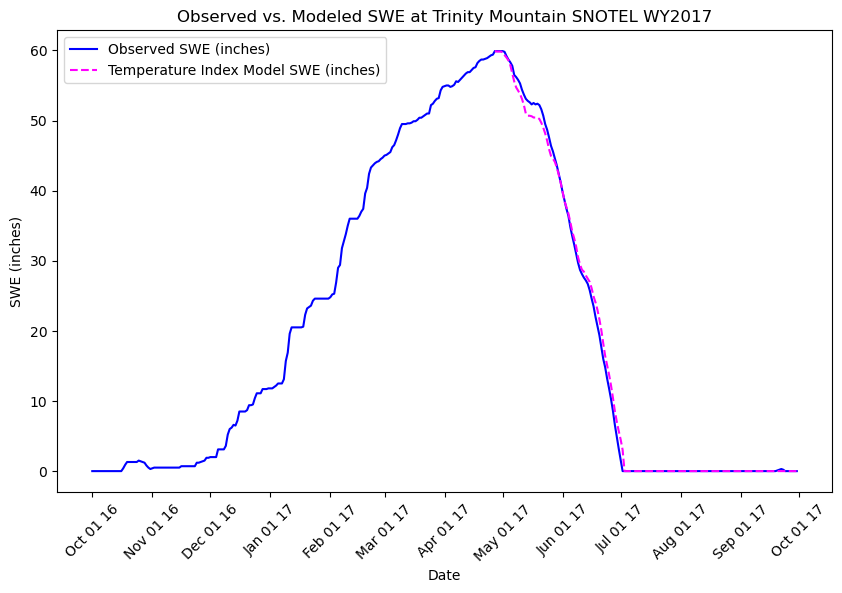

In [84]:
fig5, ax5 = plt.subplots(figsize=(10,6))
ax5.plot(df_2017_SWE['Date'],df_2017_SWE['SWE'], color='blue', label='Observed SWE (inches)')
ax5.plot(df_model_2017['Date'],df_model_2017['SWE Predicted'], color='magenta', linestyle='--', label='Temperature Index Model SWE (inches)')
ax5.set_xlabel('Date')
ax5.set_ylabel('SWE (inches)')
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax5.xaxis.set_major_locator(mdates.MonthLocator())
ax5.tick_params(axis='x', rotation=45)
ax5.set_title('Observed vs. Modeled SWE at Trinity Mountain SNOTEL WY2017')
ax5.legend()
plt.show()